# **Nicholas Saunders**
**Astronomy 425  
Homework 3**

**Problem 1**

Equation (1): $\frac{\ddot{a}(t)}{a(t)}=-\frac{4\pi G}{3c^2}[\varepsilon(t)+3P(t)]$

Equation (2): $(\frac{\dot{a}(t)}{a(t)})^2=\frac{8\pi G\varepsilon(t)}{3c^2}-\frac{kc^2}{a(t)^2}$

To solve for the third equation, first we'll rearrange equation 2 and take a time derivative:

$(\frac{\dot{a}}{a})^2=\frac{8\pi G\varepsilon}{3c^2}-\frac{kc^2}{a^2}\rightarrow \dot{a}^2=\frac{8\pi G\varepsilon}{3c^2}a^2-kc^2\rightarrow\dot{a}\ddot{a}=\frac{8\pi G}{3c^2}[\dot{\varepsilon}a^2+2\varepsilon\dot{a}a]\rightarrow\frac{\ddot{a}}{a}=\frac{4\pi G}{3c^2}[\dot{\varepsilon}\frac{a}{\dot{a}}+2\varepsilon]$

Now, we can substitute equation (1) for $\frac{\ddot{a}}{a}$:

$-\frac{4\pi G}{3c^2}[\varepsilon(t)+3P(t)]=\frac{4\pi G}{3c^2}[\dot{\varepsilon}\frac{a}{\dot{a}}+2\varepsilon]\rightarrow-\varepsilon-3P=\dot{\varepsilon}\frac{a}{\dot{a}}+2\varepsilon\rightarrow3\varepsilon+3P+\dot{\varepsilon}\frac{a}{\dot{a}}\rightarrow\dot{\varepsilon}(t)\frac{a(t)}{3\dot{a}(t)}+\varepsilon+P=0\rightarrow\boxed{\dot{\varepsilon}(t)+\frac{3\dot{a}(t)}{a(t)}(\varepsilon+P)=0}$

**Problem 2**

Using the given form of the Friedmann Equation, I wrote a python function for H(z). Then, using the scipy function *quad*, I integrated $\int_{0}^{z} \frac{cdz}{H(z)}$ to find the comoving distance r as a function of z from z=0 to z=10.

After generating the first plot, I readjusted the function H(z) to get $H_{0}$ in the correct units. Then, I wrote a function for the look back time and calculated it at high redshift to get an estimate for the age of the universe. For each case, I subtracted the look back time from the corresponding age of the universe to find the age as a function of redshift from z=0 to z=10.

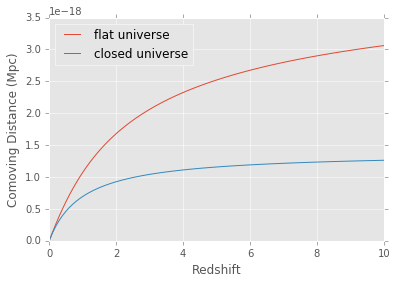

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import quad
pl.style.use('ggplot')
%matplotlib inline

h_0 = 70 # hubble constant in m/s/Mpc
c = 3e6  # speed of light in m/s

# omega_r, omega_m, omega_lambda, omega_0
args1 = (0., 0.3, 0.7)
args2 = (1., 0., 0.)

def H_z(r0,m0,L0,z):
    omega_0 = r0 + m0 + L0
    return h_0 * np.sqrt(r0*(1+z)**4 + m0*(1+z)**3 + L0 + (1-omega_0)*(1+z)**2)
  
# define functions for comoving distance    
r1 = lambda z: c / H_z(*args1,z)    
r2 = lambda z: c / H_z(*args2,z)
z = np.array(np.linspace(0,10,100))

# integrate the function r for the two cases
r_a=[];r_b=[];
for i in z:
    r_a.append(quad(r1, 0, i)[0])
    r_b.append(quad(r2, 0, i)[0])

# convert from m to Mpc
r_a = [i * 3.24078e-23 for i in r_a]
r_b = [i * 3.24078e-23 for i in r_b]

# plot results vs z
pl.plot(z, r_a, label='flat universe');
pl.plot(z, r_b, label='closed universe');
pl.legend(loc='best')
pl.xlabel("Redshift");
pl.ylabel("Comoving Distance (Mpc)");

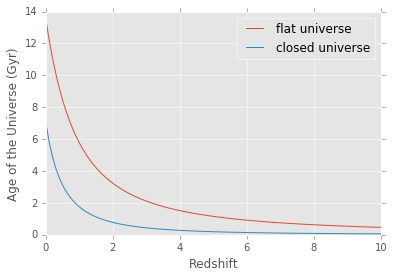

In [2]:
h_0_Gyr = .07154 # redefine h_0 and H_z for new value
def H_z2(r0, m0, L0,z):
    omega_0 = r0 + m0 + L0
    return h_0_Gyr * np.sqrt(r0*(1+z)**4 + m0*(1+z)**3 + L0 + (1-omega_0)*(1+z)**2)

# define functions for the look back time
lookback1 = lambda z: 1 / ((1.0 + z) * H_z2(*args1,z))
lookback2 = lambda z: 1 / ((1.0 + z) * H_z2(*args2,z))

# calculate the lookback time for very high redshift
# which can be used as an estimate for the age of the universe
rough_age1 = quad(lookback1, 0, 10000)[0]
rough_age2 = quad(lookback2, 0, 10000)[0]

# subtract calculation for look back time from this estimate
t_a=[];t_b=[];
for i in z:
    t_a.append(rough_age1 - quad(lookback1, 0, i)[0])
    t_b.append(rough_age2 - quad(lookback2, 0, i)[0])

#plot age of the universe vs z
pl.plot(z, t_a, label="flat universe");
pl.plot(z, t_b, label="closed universe");
pl.legend(loc='best')
pl.xlabel("Redshift");
pl.ylabel("Age of the Universe (Gyr)");

**Problem 3**

To solve this problem, I set up a function for the look back time of a universe with $\Omega_r$ set to a variable, and $\Omega_m=\Omega_{\Lambda}=0$.Then, I iterated through the value for $\Omega_r$ and calculated the age of the universe by integrating until it was within 0.1% of the age of the flat universe.

In [3]:
print("Age of flat universe: ~%.4f" % rough_age1)

omega_r = 0
rough_age_r = 0
n = np.linspace(0, 1, 100000)

for i in n:
    if abs(rough_age_r - rough_age1) >= 10e-3:
        lookback_r = lambda z: 1 / ((1.0 + z) * H_z2(i,0,0,z))
        rough_age_r = quad(lookback_r,0,10000)[0]
    else:
        omega_r = i
        break


print("Age of radiation only universe: ~%.4f" % rough_age_r)
print("Value of Omega_r: ~%.5f" % omega_r)

Age of flat universe: ~13.4764
Age of radiation only universe: ~13.4846
Value of Omega_r: ~0.00135
